#House Price Prediction Using Linear Regression From Scratch

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn import metrics
%matplotlib inline

In [54]:
data = pd.read_csv("/content/housing.csv")
data.shape

(20640, 10)

In [55]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [58]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


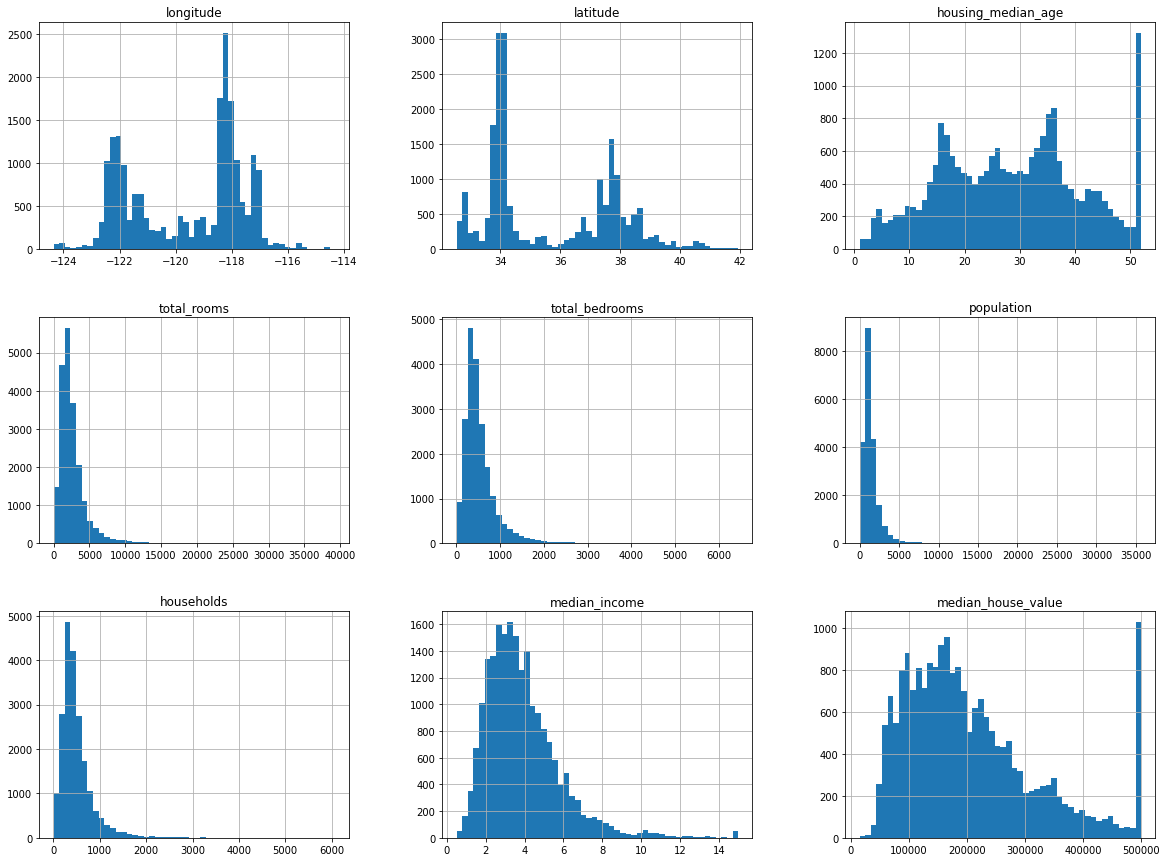

In [59]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [60]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [61]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


##Visualizing Data To Gain Insights

In [62]:
data = train_data.copy()

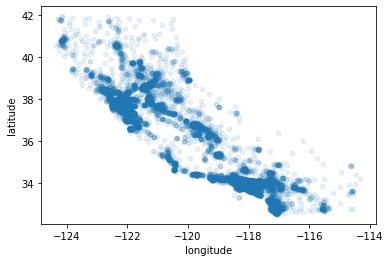

In [63]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

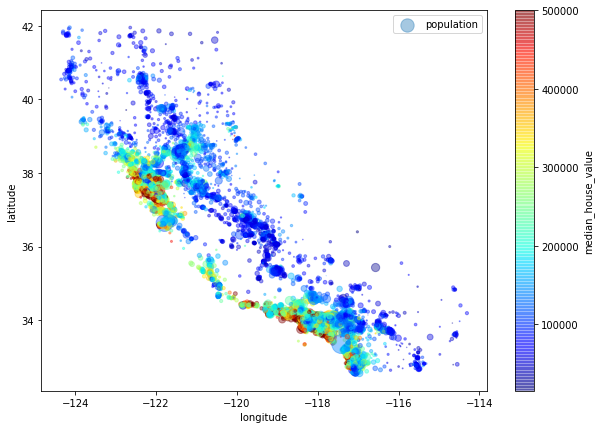

In [64]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [65]:
corr_matrix = data.corr()

In [66]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba2e653dd0>,
      dtype=object)

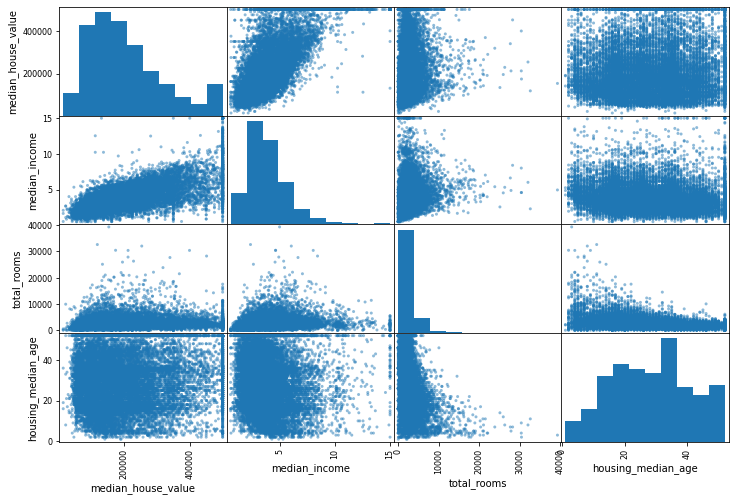

In [67]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(data[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

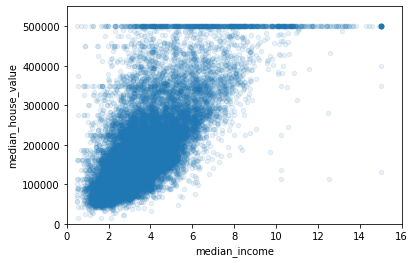

In [68]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

plt.axis([0, 16, 0, 550000])

In [69]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]

In [70]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

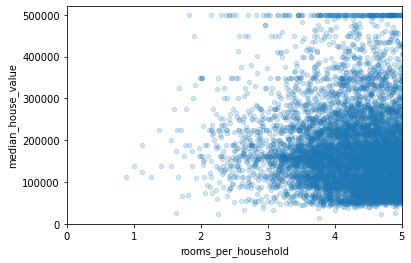

In [71]:
data.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [72]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738,5.435235,0.212858,3.096961
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448,2.387375,0.057995,11.578744
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000,4.452055,0.175178,2.428799
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000,5.235874,0.202808,2.817240
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000,6.061037,0.239501,3.280000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


##Preparing Data for Algorithms

In [73]:
data_labels = train_data["median_house_value"]
data = train_data.drop("median_house_value", axis=1)

In [74]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [75]:
data_num = data.drop("ocean_proximity", axis=1)

In [76]:
imputer.fit(data_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [77]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [78]:
data_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

Tranform the training set

In [79]:
X = imputer.transform(data_num)

In [80]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                       index=data.index)

In [81]:
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [82]:
imputer.strategy

'median'

Let's preprocess the categorical features

In [83]:
data_cat = data[["ocean_proximity"]]
data_cat.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


In [84]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
data_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [86]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attributes

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)

In [88]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    data.columns.get_loc(c) for c in col_names]

In [89]:
data_extra_attribs = pd.DataFrame(
    data_extra_attribs,
    columns=list(data.columns)+["rooms_per_household", "population_per_household"],
    index=data.index)
data_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
14196,-117.03,32.71,33,3126,627,2300,623,3.2596,NEAR OCEAN,5.01766,3.69181
8267,-118.16,33.77,49,3382,787,1314,756,3.8125,NEAR OCEAN,4.47354,1.7381
17445,-120.48,34.66,4,1897,331,915,336,4.1563,NEAR OCEAN,5.64583,2.72321
14265,-117.11,32.69,36,1421,367,1418,355,1.9425,NEAR OCEAN,4.00282,3.99437
2271,-119.8,36.78,43,2382,431,874,380,3.5542,INLAND,6.26842,2.3


Now let's build a pipeline for preprocessing the numerical attributes:

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [91]:
data_num_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
         0.05137609, -0.2117846 ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
        -0.11736222,  0.34218528],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.03227969, -0.66165785],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.02030568,  0.99951387],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
         0.00707608, -0.79086209],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
        -0.08535429,  1.69520292]])

In [92]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [93]:
data_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [94]:
data_prepared.shape

(16512, 16)

##Forward Propagation

In [129]:
def forward_propagate(X, y, W, b):
  m = X.shape[1]

  h = np.dot(W.T, X) + b

  cost = -(1/2*m) * np.sum(np.square(h - y))

  dW = (1/m) * np.dot(X, (h-y).T)
  db = (1/m) * np.sum((h - y))

  cost = np.squeeze(cost)

  grads = {"dW": dW,
           "db": db}
           
  return grads, cost

##Vanilla Gradient Descent

In [130]:
def gradientDescent(X, y, W, b, num_iter, learning_rate):
  costs = []
  for i in range(0, num_iter):

    grads, cost = forward_propagate(X, y, W, b)

    dW = grads["dW"]
    db = grads["db"]

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if i % 100 == 0:
            costs.append(cost)

  params = {"W": W,
            "b": b}

  grads = {"dW": dW,
           "db": db}

  return params, grads, costs

##Predicting Values

In [162]:
def predict(X, W, b):
  m = X.shape[1]
  y_preds = np.zeros((1, m))
  W = W.reshape((X.shape[0], 1))

  y_preds = np.dot(W.T, X) + b
  
  return y_preds

##Final Compilation of the Whole Model

In [163]:
from sklearn.metrics import r2_score

def model(X_train, y_train, X_test, y_test, num_iter=1000, learning_rate=0.01):
  W = np.zeros((X_train.shape[0], 1))
  b = 0

  params, grads, costs = gradientDescent(X_train, y_train, W, b, num_iter, learning_rate)

  W = params["W"]
  b = params["b"]

  y_preds_train = predict(X_train, W, b)
  y_preds_test = predict(X_test, W, b)

  print("r2 score for training data: {} %".format(r2_score(y_train.T, y_preds_train.T)))  
  print("r2 score for test data: {} %".format(r2_score(y_test.T, y_preds_test.T)))


  data = {"costs": costs,
         "y_preds_train" : y_preds_train, 
         "y_preds_test": y_preds_test,
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iter}
  return data

In [99]:
X_train, X_val, y_train, y_val = train_test_split(data_prepared, data_labels, test_size=0.2, random_state=42)

In [100]:
X_train = np.array(X_train).T
y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape[0], 1).T
X_val = np.array(X_val).T
y_val = np.array(y_val)
y_val = y_val.reshape(y_val.shape[0], 1).T

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((16, 13209), (1, 13209), (16, 3303), (1, 3303))

##Accuracy of the Model

In [164]:
d = model(X_train, y_train, X_val, y_val, 7000, 0.001)

r2 score for training data: 0.6431283301166408 %
r2 score for test data: 0.6488057526300264 %


##Using SKLearn to compare the values

In [148]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train.T, y_train.T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
lin_reg.predict(X_val.T)

array([[138190.6029603 ],
       [130592.32893019],
       [303091.85508699],
       ...,
       [205186.89529424],
       [223189.16763996],
       [192811.45519184]])

In [150]:
from sklearn.metrics import mean_squared_error

data_preds = lin_reg.predict(X_val.T)
data_preds
lin_mse = mean_squared_error(y_val.T, data_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68657.04650742412

In [152]:
from sklearn.metrics import r2_score
r2_score(y_val.T, data_preds)

0.6584180098010338

In [154]:
data_preds.shape
y_val.T.shape

(3303, 1)